<a href="https://colab.research.google.com/github/Ali-Tarhini/Repository1/blob/master/Copy_of_Step_2_1_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib

Matplotlib is a numerical mathematics extension NumPy and a great package to view or present data in a pictorial or graphical format. It enables analyts and decision makers to see analytics presented visually, so they can grasp difficult concepts or identify new patterns. 

This is the most complicated of the three methods. I’ll show it for those that have uploaded CSV files into their Google Drive for workflow control. First, type in the following code: (put the CSV files in your drive in a folder called data inside the colab Notebooks)

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
!pip install PyDrive


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

class download_data_from_folder(object):
    def __init__(self,path):
        path_id = path[path.find('id=')+3:]
        self.file_list = self.get_files_in_location(path_id)
        self.unwrap_data(self.file_list)
    def get_files_in_location(self,folder_id):
        file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()
        return file_list
    def unwrap_data(self,file_list,directory='.'):
        for i, file in enumerate(file_list):
            print(str((i + 1) / len(file_list) * 100) + '% done copying')
            if file['mimeType'].find('folder') != -1:
                if not os.path.exists(os.path.join(directory, file['title'])):
                    os.makedirs(os.path.join(directory, file['title']))
                print('Copying folder ' + os.path.join(directory, file['title']))
                self.unwrap_data(self.get_files_in_location(file['id']), os.path.join(directory, file['title']))
            else:
                if not os.path.exists(os.path.join(directory, file['title'])):
                    downloaded = drive.CreateFile({'id': file['id']})
                    downloaded.GetContentFile(os.path.join(directory, file['title']))
        return None

In [3]:
data_path = 'https://drive.google.com/open?id=13hFQ09ptYr-Ud5xOJ0Xx4cV0akc1RnZw'
download_data_from_folder(data_path)

4.3478260869565215% done copying
8.695652173913043% done copying
13.043478260869565% done copying
17.391304347826086% done copying
21.73913043478261% done copying
26.08695652173913% done copying
30.434782608695656% done copying
34.78260869565217% done copying
39.130434782608695% done copying
43.47826086956522% done copying
47.82608695652174% done copying
52.17391304347826% done copying
56.52173913043478% done copying
60.86956521739131% done copying
65.21739130434783% done copying
69.56521739130434% done copying
73.91304347826086% done copying
78.26086956521739% done copying
82.6086956521739% done copying
86.95652173913044% done copying
91.30434782608695% done copying
95.65217391304348% done copying
100.0% done copying


In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib     
%matplotlib inline  

# Hide all warning messages
import warnings
warnings.filterwarnings('ignore')

There are 2 broad ways of using pyplot:  
* The most common and easy approach of using global functions to build and display a global figure using matplotlib as a global state machine

* The second way is object oriented. You obtain an empty figure from a global factory, and then build the plot explicitly using the methods of the Figure and the classes it contains

### Using global functions

* plt.bar – creates a bar chart
* plt.scatter – makes a scatter plot
* plt.boxplot – makes a box and whisker plot
* plt.hist – makes a histogram
* plt.plot – creates a line plot

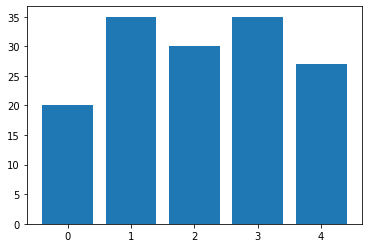

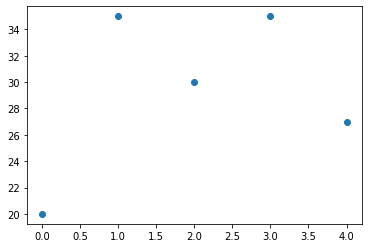

In [5]:
# simple bar and scatter plot
x = np.arange(5)          # assume there are 5 students
y = (20, 35, 30, 35, 27)  # their test scores
plt.bar(x,y)              # Barplot
# need to close the figure using show() or close(), if not closed any follow up plot commands will use same figure. 
plt.show()                # Try commenting this an run
plt.scatter(x,y)          # scatter plot
plt.show()

Histogram


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3812f9828>,
      dtype=object)

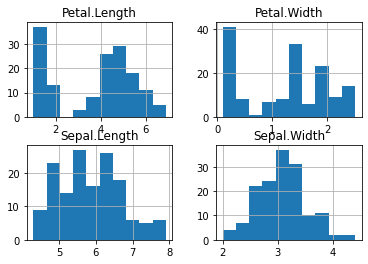

In [8]:
# You can also create the histogram, line graph and the boxplot directly on a dataframe
df = pd.read_csv('/content/drive/My Drive/data/iris.csv')
print("Histogram")
df.hist()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Line graph


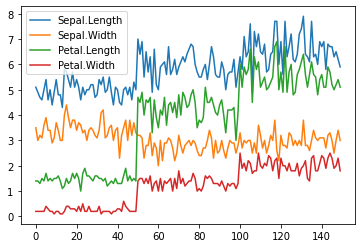

In [9]:
print("Line graph")
df.plot()

Box plot


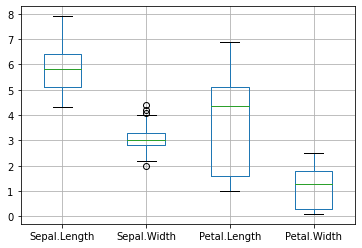

In [10]:
print("Box plot")
df.boxplot()

### Customize axis labels

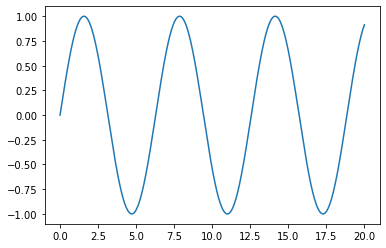

In [11]:
# generate sample data
x = np.linspace(0, 20, 1000)  #100 evenly-spaced values from 0 to 50
y = np.sin(x)

plt.plot(x, y) # simple line plot

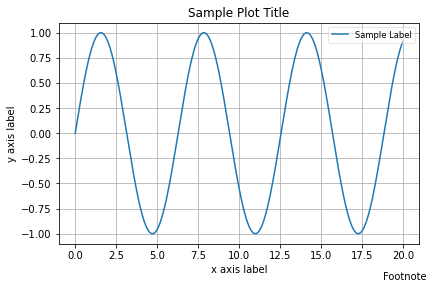

In [12]:
# customize axis labels
plt.plot(x, y, label = 'Sample Label') 
plt.title('Sample Plot Title')                                # chart title 
plt.xlabel('x axis label')                                    # x axis title
plt.ylabel('y axis label')                                    # y axis title
plt.grid(True)                                                # show gridlines 
plt.figtext(0.995, 0.01, 'Footnote', ha='right', va='bottom') # add footnote
plt.legend(loc='best', framealpha=0.5, prop={'size':'small'}) # add legend, location pick the best automatically

# tight_layout() can take keyword arguments of pad, w_pad and h_pad.
# these control the extra padding around the figure border and between subplots.
# The pads are specified in fraction of fontsize.
plt.tight_layout(pad=1)

In [13]:
# Saving chart to a file
plt.savefig('filename.png') 

<Figure size 432x288 with 0 Axes>

In [14]:
plt.close()  # Close the current window to allow new plot creation on separate window / axis
# Alternatively we can use show()
plt.show()   # Note: also closes the window 

### Matplotlib: intro to the object oriented way 

The Figure is the top-level container for everything on a canvas. It was obtained from the global Figure factory. 

#### An Axes or Subplot (a subclass of Axes) 

An Axes is a container class for a specific plot. A figure may contain many Axes and/or Subplots. Subplots are laid out in a grid within the Figure. Axes can be placed anywhere on the Figure. 

ax = fig.add_subplot(2,2,1) # row-col-num 
ax = fig.add_axes([0.1,0.1,0.8,0.8])

### All at once

We can use the subplots factory to get the Figure and all the desired Axes at once. 

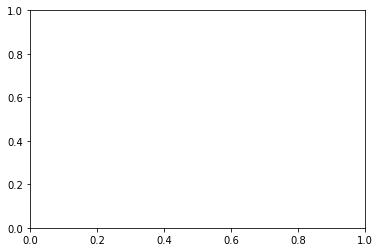

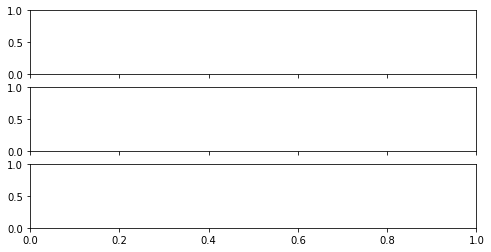

In [15]:
fig, ax = plt.subplots() 
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8,4))

In [16]:
# Iterating the Axes within a Figure 
for ax in fig.get_axes():
    pass # do something 

### Line plots – using ax.plot() 

Single plot constructed with Figure and Axes 

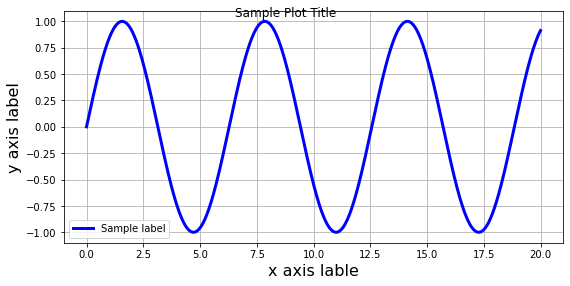

In [17]:
# generate sample data
x = np.linspace(0, 20, 1000)
y = np.sin(x)

fig = plt.figure(figsize=(8,4))                        # get an empty figure and add an Axes 
ax = fig.add_subplot(1,1,1)                            # row-col-num 
ax.plot(x, y, 'b-', linewidth=3, label='Sample label') # line plot data on the Axes 
# add title, labels and legend, etc. 
ax.set_ylabel('y axis label', fontsize=16)             # y label
ax.set_xlabel('x axis lable', fontsize=16)             # x label    
ax.legend(loc='best')                                  # legend
ax.grid(True)                                          # show grid
fig.suptitle('Sample Plot Title')                      # title
fig.tight_layout(pad=1)                                # tidy laytout
# fig.savefig('filename.png', dpi=125)  

### Multiple lines on same axis

Text(0.5, 0.98, 'A Simple Multi Axis Line Plot')

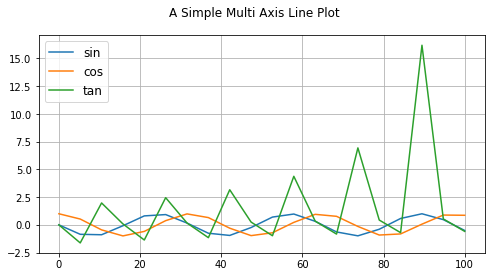

In [18]:
# get the Figure and Axes all at once
fig, ax = plt.subplots(figsize=(8,4))

x1 = np.linspace(0, 100, 20) 
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)

ax.plot(x1, y1, label='sin')
ax.plot(x2, y2, label='cos')
ax.plot(x3, y3, label='tan')

# add grid, legend, title and save 
ax.grid(True) 

ax.legend(loc='best', prop={'size':'large'}) 

fig.suptitle('A Simple Multi Axis Line Plot')
# fig.savefig('filename.png', dpi=125) 

### Mulitple lines on different axis

Text(0.5, 0.98, 'A Simple Multi Axis Line Plot')

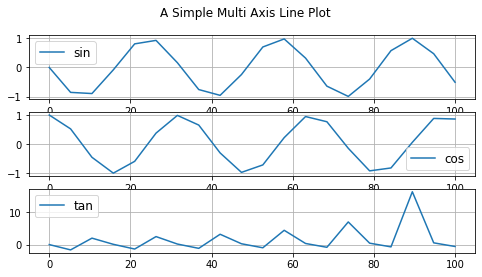

In [19]:
# Changing sharex to True will use the same x axis
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, sharey = False, figsize=(8,4))

# plot some lines 
x1 = np.linspace(0, 100, 20) 
x2 = np.linspace(0, 100, 20)
x3 = np.linspace(0, 100, 20)
y1 = np.sin(x1)
y2 = np.cos(x2)
y3 = np.tan(x3)

ax1.plot(x1, y1, label='sin')
ax2.plot(x2, y2, label='cos')
ax3.plot(x3, y3, label='tan')

# add grid, legend, title and save 
ax1.grid(True) 
ax2.grid(True)
ax3.grid(True)

ax1.legend(loc='best', prop={'size':'large'}) 
ax2.legend(loc='best', prop={'size':'large'}) 
ax3.legend(loc='best', prop={'size':'large'}) 

fig.suptitle('A Simple Multi Axis Line Plot')
# fig.savefig('filename.png', dpi=125) 

### Control line style and marker style

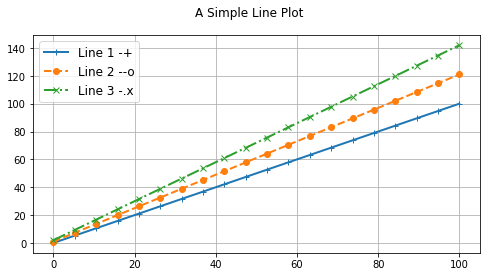

In [20]:
# get the Figure and Axes all at once 
fig, ax = plt.subplots(figsize=(8,4)) 
# plot some lines 
N = 3 # the number of lines we will plot 
styles =  ['-', '--', '-.', ':'] 
markers = list('+ox') 
x = np.linspace(0, 100, 20) 
for i in range(N): # add line-by-line     
    y = x + x/5*i + i     
    s = styles[i % len(styles)]     
    m = markers[i % len(markers)]     
    ax.plot(x, y, alpha = 1, label='Line '+str(i+1)+' '+s+m,       
                  marker=m, linewidth=2, linestyle=s) 
# add grid, legend, title and save 
ax.grid(True) 
ax.legend(loc='best', prop={'size':'large'}) 
fig.suptitle('A Simple Line Plot')
fig.savefig('filename.png', dpi=125) 

### Bar plots – using ax.bar() and ax.barh() 

A simple bar chart.

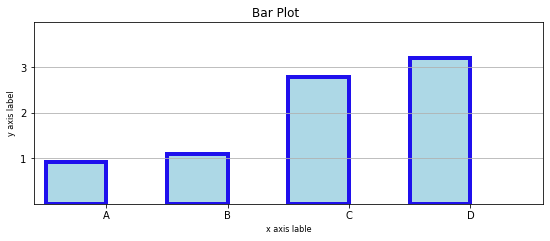

In [21]:
# get the data
N = 4 
labels = list('ABCD') 
data = np.array(range(N)) + np.random.rand(N)

#plot the data 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.5;  
tickLocations = np.arange(N) 
rectLocations = tickLocations-(width/2.0) 

# for color either HEX value of the name of the color can be used
ax.bar(rectLocations, data, width,      
       color='lightblue',     
       edgecolor='#1f10ed', linewidth=4.0) 
# tidy-up the plot 
ax.set_xticks(ticks= tickLocations)
ax.set_xticklabels(labels) 
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6) 
ax.set_yticks(range(N)[1:]) 
ax.set_ylim((0,N)) 
ax.set_ylabel('y axis label', fontsize=8)             # y label
ax.set_xlabel('x axis lable', fontsize=8)             # x label    
ax.yaxis.grid(True)
# title and save 
fig.suptitle("Bar Plot") 
fig.tight_layout(pad=2) 
# fig.savefig('filename.png', dpi=125)

### Horizontal bar charts 

Just as tick placement needs to be managed with vertical bars; so with horizontal bars which are above the y-tick mark

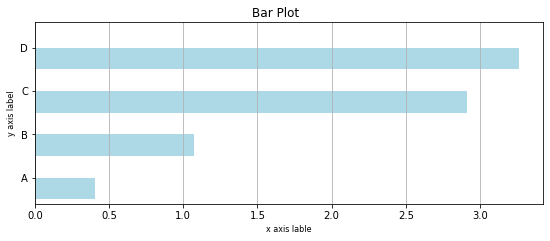

In [22]:
# get the data
N = 4 
labels = list('ABCD') 
data = np.array(range(N)) + np.random.rand(N)

#plot the data 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.5;  
tickLocations = np.arange(N) 
rectLocations = tickLocations-(width/2.0) 

# for color either HEX value of the name of the color can be used
ax.barh(rectLocations, data, width, color='lightblue') 
# tidy-up the plot 
ax.set_yticks(ticks= tickLocations)
ax.set_yticklabels(labels) 
ax.set_ylim(min(tickLocations)-0.6, max(tickLocations)+0.6) 
ax.xaxis.grid(True)
ax.set_ylabel('y axis label', fontsize=8)             # y label
ax.set_xlabel('x axis lable', fontsize=8)             # x label 
# title and save 
fig.suptitle("Bar Plot") 
fig.tight_layout(pad=2) 
# fig.savefig('filename.png', dpi=125)

### Side by side bar chart 

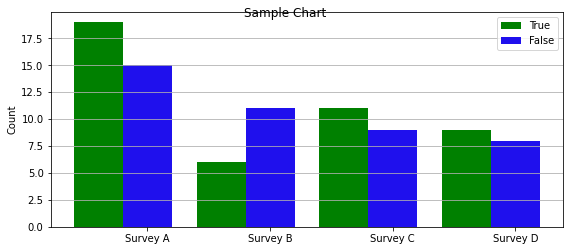

In [23]:
# generate sample data
pre = np.array([19, 6, 11, 9]) 
post = np.array([15, 11, 9, 8]) 
labels=['Survey '+x for x in list('ABCD')] 
# the plot – left then right 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.4 # bar width 
xlocs = np.arange(len(pre)) 
ax.bar(xlocs-width, pre, width,       
       color='green', label='True') 
ax.bar(xlocs, post, width,       
       color='#1f10ed', label='False')
# labels, grids and title, then save 
ax.set_xticks(ticks=range(len(pre))) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best') 
ax.set_ylabel('Count') 
fig.suptitle('Sample Chart') 
fig.tight_layout(pad=1) 
# fig.savefig('filename.png', dpi=125) 

### Stacked bar 

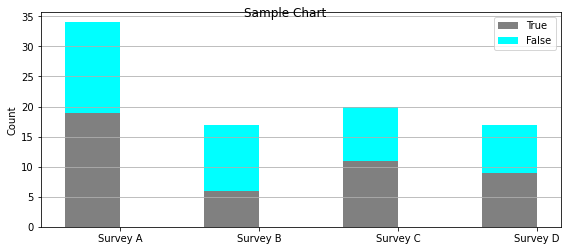

In [24]:
# generate sample data
pre = np.array([19, 6, 11, 9]) 
post = np.array([15, 11, 9, 8]) 
labels=['Survey '+x for x in list('ABCD')] 
# the plot – left then right 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
width = 0.4 # bar width 
xlocs = np.arange(len(pre)+2) 
adjlocs = xlocs[1:-1] - width/2.0 
ax.bar(adjlocs, pre, width,       
       color='grey', label='True') 
ax.bar(adjlocs, post, width,       
       color='cyan', label='False',
       bottom=pre)
# labels, grids and title, then save 
ax.set_xticks(ticks=xlocs[1:-1]) 
ax.set_xticklabels(labels) 
ax.yaxis.grid(True) 
ax.legend(loc='best') 
ax.set_ylabel('Count') 
fig.suptitle('Sample Chart') 
fig.tight_layout(pad=1) 
# fig.savefig('filename.png', dpi=125) 

### Pie Chart – using ax.pie() 

Text(0.5, 0.98, 'ML Pie')

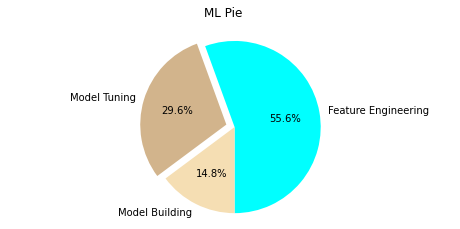

In [25]:
# generate sample data 
data = np.array([15,8,4]) 
labels = ['Feature Engineering', 'Model Tuning', 'Model Building']
explode = (0, 0.1, 0) # explode feature engineering  
colrs=['cyan', 'tan', 'wheat']
# plot 
fig, ax = plt.subplots(figsize=(8, 3.5)) 
ax.pie(data, explode=explode,     
       labels=labels, autopct='%1.1f%%',     
       startangle=270, colors=colrs) 
ax.axis('equal') # keep it a circle
# tidy-up and save 
fig.suptitle("ML Pie") 
# fig.savefig('filename.png', dpi=125)

Text(0.5, 0.98, 'Subplots')

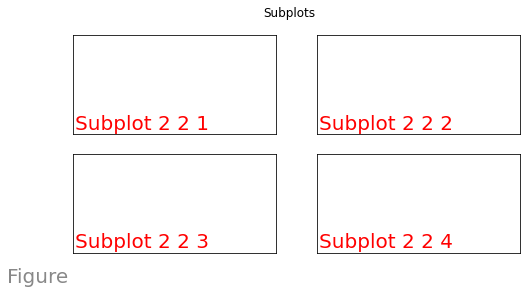

In [26]:
# Simple subplot grid layouts 
fig = plt.figure(figsize=(8,4)) 
fig.text(x=0.01, y=0.01, s='Figure',color='#888888', ha='left', va='bottom', fontsize=20) 

for i in range(4):     
    # fig.add_subplot(nrows, ncols, num)     
    ax = fig.add_subplot(2, 2, i+1)      
    ax.text(x=0.01, y=0.01, s='Subplot 2 2 '+str(i+1),  color='red', ha='left', va='bottom', fontsize=20)    
    ax.set_xticks([]); ax.set_yticks([]) 
ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('Subplots')
#fig.savefig('filename.png', dpi=125) 

# Plotting – defaults 

Configuration files Matplotlib uses configuration files to set the defaults. So that you can edit it, the location of the configuration file can be found as follows:

In [27]:
print (matplotlib.matplotlib_fname()) 

/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc


In [28]:
# Configuration settings The current configuration settings 

print (matplotlib.rcParams) 

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes

In [29]:
# Change the default settings 

plt.rc('figure', figsize=(8,4), dpi=125,facecolor='white', edgecolor='white')
plt.rc('axes', facecolor='#e5e5e5',  grid=True, linewidth=1.0, axisbelow=True)
plt.rc('grid', color='white', linestyle='-',    linewidth=2.0, alpha=1.0) 
plt.rc('xtick', direction='out') 
plt.rc('ytick', direction='out') 
plt.rc('legend', loc='best') 
 